In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

## Latencia

En este apartado se grafican los resultados intentando obtener la menor latencia posible con tasas despreciables para cada pipeline de cada framework

In [11]:
# variables definition

files_path = "D:/resultados_memoria/latencia"
pipelines = ["iot", "log", "twitter"]
frameworks = ["AB", "AF", "KS", "AS"]
to_graph = {
    "iot": [], # list of tuples: (framework_name (str), list_final_latency)
    "log": [],
    "twitter": []
}
# parse raw data from csv

pathlist = Path(files_path)
for path in pathlist.iterdir():
    for pipeline in pipelines:
        if pipeline in str(path):
            framework = re.sub("_", "", str(re.findall(r"_\w+_", str(path))[0]))
            df = pd.read_csv(str(path)+f"/{pipeline}_timestamps_result.csv", sep= ";")
            latency_list = df['final_latency'].tolist()
            if len(latency_list) > 120:
                latency_list = latency_list[0:120]
            t = (framework, latency_list)
            to_graph[pipeline].append(t)
            
# graph the data in to_graph
def graph_latency_data(spark_only=False):
    for key in to_graph:
        fig, ax = plt.subplots()
        ax.set_xticklabels([])
        plt.title(f'Pipeline {key.capitalize()}')
        plt.ylabel('Latencia')
        plt.xlabel('Tiempo')
        for tple in to_graph[key]:
            framework_name, latency_list = tple
            if spark_only:
                if framework_name == "KS" or framework_name == "AB" or framework_name == "AF": continue
            else:
                if framework_name == "AS": continue
            time = range(0, len(latency_list))
            ax.plot(time, latency_list, label=framework_name)
            ax.legend()
        plt.show()
        
#graph_latency_data(spark_only=False)

## Uso de CPU

A continuación se graficará el uso de CPU para las pruebas de latencia (menor latencia posible) y tasa de transferencia (mayor tasa alcanzable)

latencia


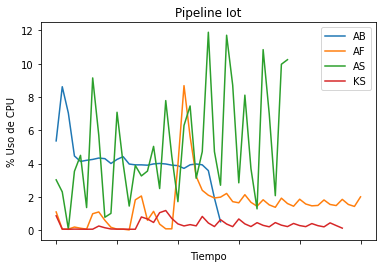

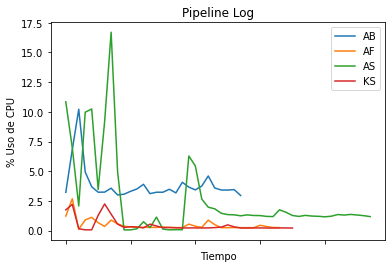

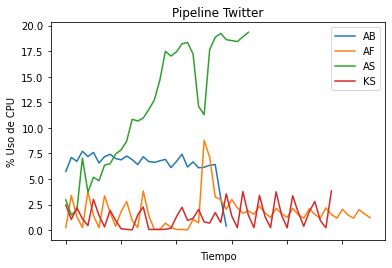



--------------


tasa


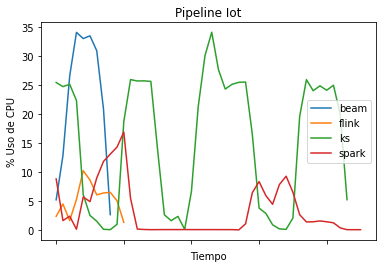

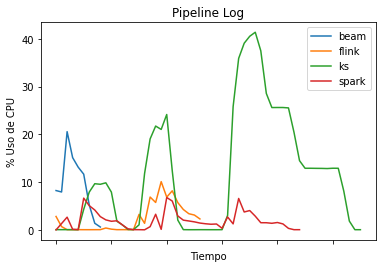

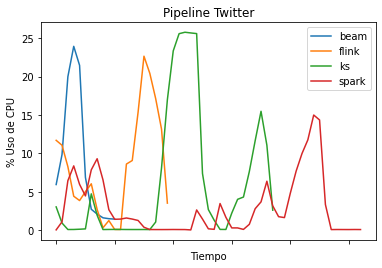



--------------




In [36]:
# exclude non float values from data downloaded from google cloud
def clean_list(cpu_vals):
    new_list = []
    for val in cpu_vals:
        new_val = 0
        try:
            new_val = float(val)
            if new_val > 1: continue
        except:
            #print("valor no se pudo convertir a flotante, saltando")
            continue
        new_list.append(new_val*100)
    return new_list

# graph the data in to_graph
def graph_cpu_ussage():
    for folder in folders:
        print(folder)
        for pipeline in pipelines:
            fig, ax = plt.subplots()
            ax.set_xticklabels([])
            plt.title(f'Pipeline {pipeline.capitalize()}')
            plt.ylabel('% Uso de CPU')
            plt.xlabel('Tiempo')
            for tple in to_graph[folder]:
                fm_path, cpu_values = tple
                if pipeline in fm_path:
                    #print(fm_path)
                    fm_name = fm_path.split("_")[2]
                    time = range(0, len(cpu_values))
                    ax.plot(time, cpu_values, label=fm_name)
                    ax.legend()
        plt.show()
        print("\n")
        print("--------------")
        print("\n")
        
####

folders = ["latencia", "tasa"]
pipelines = ["iot", "log", "twitter"]
to_graph = {
    "latencia": [], # list of tuples: (csv_path, cpu_values_list)
    "tasa": [],
}

for folder in folders:
    path = f"D:/resultados_memoria/{folder}"
    pathlist = Path(path)
    for fm_path in pathlist.iterdir():
        csv_path = f"{str(fm_path)}/Uso_de_CPU.csv"
        df = pd.read_csv(csv_path)
        cpu_vals_list = clean_list(df[df.columns[1]].tolist())
        to_graph[folder].append((csv_path, cpu_vals_list))
        
graph_cpu_ussage()
    
    